In [6]:
#import the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("googleplaystore.csv")

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Finding & handling the missing data

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.dropna(inplace=True)

Size column has characters 'M' and 'k'. so we have to remove them and convert the values , after that we will change the data type of Size column to Float64

In [521]:
def change(x):
    if 'M' in x:
        z=x[:-1]
        z=float(z)*1000
        return z
    
    elif 'k' in x:
        z=x[:-1]
        z=float(z)
        return z
    
    else : return None
    
df.Size = df.Size.map(change)    
    

In [ ]:
def change(x):
    if M in x:
        z=x[:,-1]
        z=float(z)*1000

In [522]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

values which are not defined with 'M','k' are replaced with NaN.It has to be filled.

In [523]:
df["Size"].isnull().sum()

1637

In [524]:
df["Size"].fillna(method='pad',inplace=True)
df["Size"].isnull().sum()

0

In [10]:
df["Reviews"]=df["Reviews"].astype('float')

In [526]:
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price']=df['Price'].astype('float')

In [ ]:
df["price"]=df["Price"].astype

In [527]:
df.Installs = df.Installs.apply(lambda x: x.replace(',','').replace('+',''))

In [528]:
df.Installs=df.Installs.astype('float')

# Sanity check

App ratings should not exceed the range of 5,delete the rows having ratings > 5 if it exists

In [510]:
a=df['Rating']>5
a.value_counts()

False    8494
Name: Rating, dtype: int64

In [534]:
df[df['Reviews']> df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [511]:
df=df[df.Reviews<df.Installs].copy()


Number of reviews must be less than number of installs because a user can't give a review without checking the app, but if this is the case then delete the row

In [537]:
df.loc[(df.Type=='Free') & (df.Price>0),['Type','Price']]

,Type,Price


Free Apps must have no price value,but if they have then delete the rows

# Univariate analysis

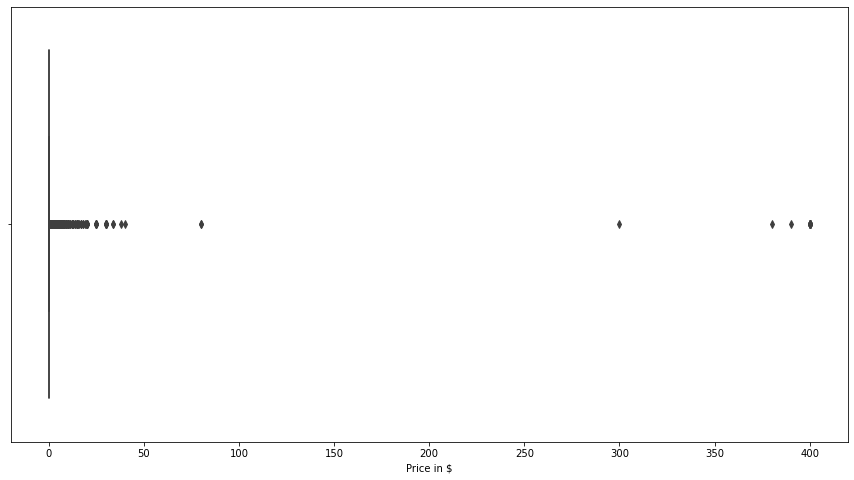

In [436]:
plt.figure(figsize=(15,8))
sns.boxplot(df.Price)
plt.xlabel("Price in $")
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Frequency'>

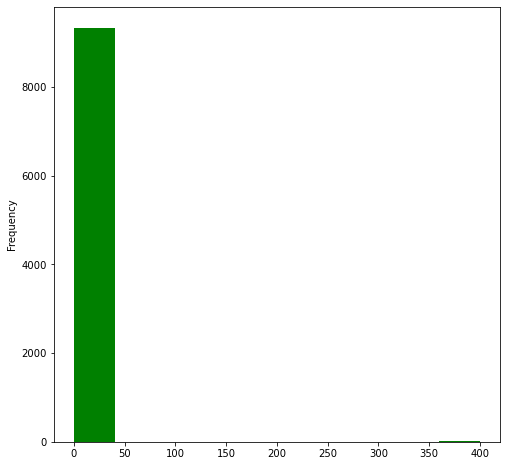

In [437]:
df.Price.plot.hist(color='green', figsize=(8,8))

Few apps have a price above 200$

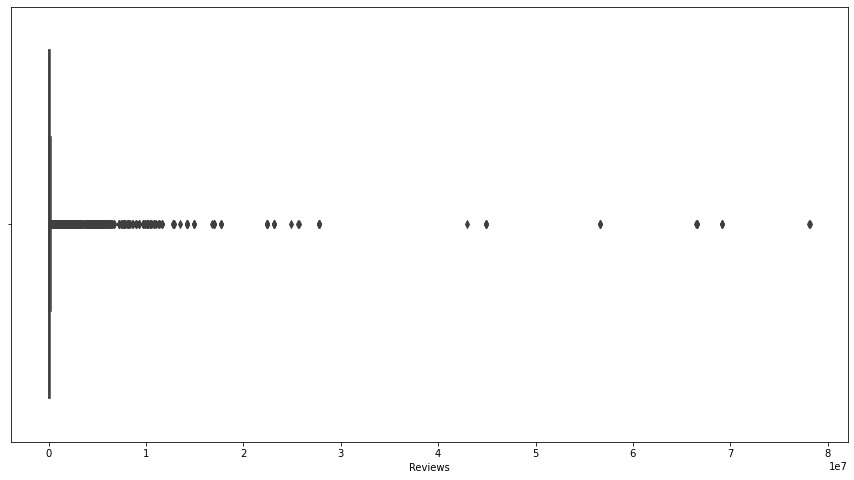

In [438]:
plt.figure(figsize=(15,8))
sns.boxplot(df.Reviews)
plt.show()

In [439]:
df['Reviews'].describe()

count    9.351000e+03
mean     5.148707e+05
std      3.146496e+06
min      1.000000e+00
25%      1.880000e+02
50%      5.968000e+03
75%      8.187600e+04
max      7.815831e+07
Name: Reviews, dtype: float64

The mean of Reviews is 51437.6 with a standard deviation of 3145023 between them.
There are several outliers.

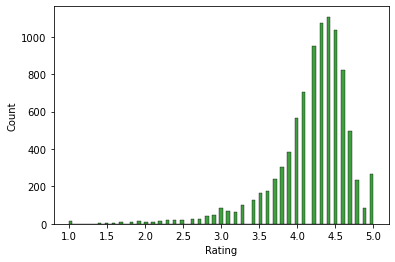

In [440]:
sns.histplot(data=df['Rating'], color='g')
plt.show()

Most apps have HIGH ratings

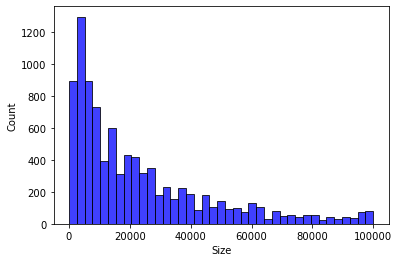

In [441]:
sns.histplot(data=df.Size, color='b')
plt.show()

Most apps' size are below 20000bytes

# Outlier treatment

In [513]:
df=df[df.Price<200].copy()

In [514]:
df=df[df.Reviews<=2000000].copy()

In [444]:
df.Installs.quantile([0.1, 0.25,0.5,0.7,0.9,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [445]:
df.drop(df[df['Installs']>10000000].index, inplace=True)

1. Apps having price of 200$ and above seems to be suspicious and appears to be junk.Hence we are discarding those apps.
2. Apps with very high number of reviews will not help in our analysis.Hence we discard those apps having reviews more than 2000000. 
3. 95th percentile of 'Installs' is 10000000. Number of Installs above 95th percentile is considered as outlier and hence we drop them.

# Bivariate Analysis

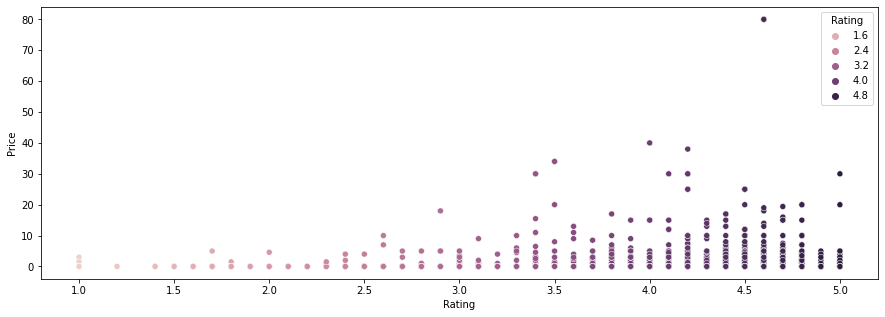

In [446]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.Rating,df.Price,hue=df.Rating)
plt.show()

1. Price doesnot mean better rating of the apps
2. Most ratings are in the range 4.3 to 4.8

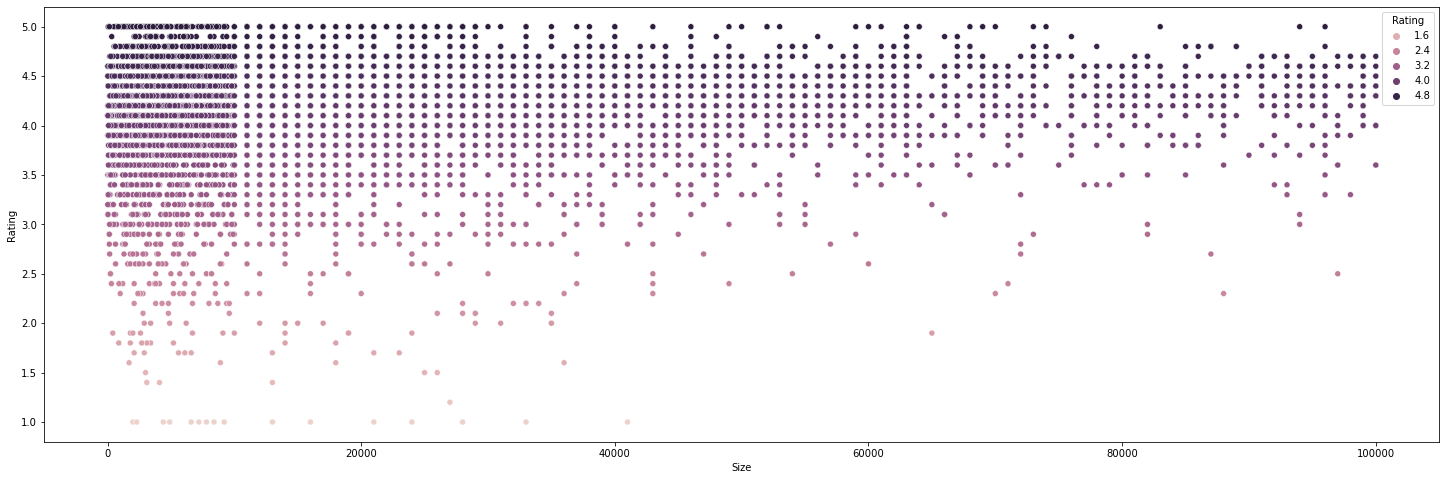

In [447]:
plt.figure(figsize=(25,8))
sns.scatterplot(df.Size,df.Rating,hue=df.Rating)
plt.show()



Here We can see most app has size between 1 to 60000

Heavy apps ratings is around 4.4 to 4.7

Lighter apps has better ratings than heavy apps

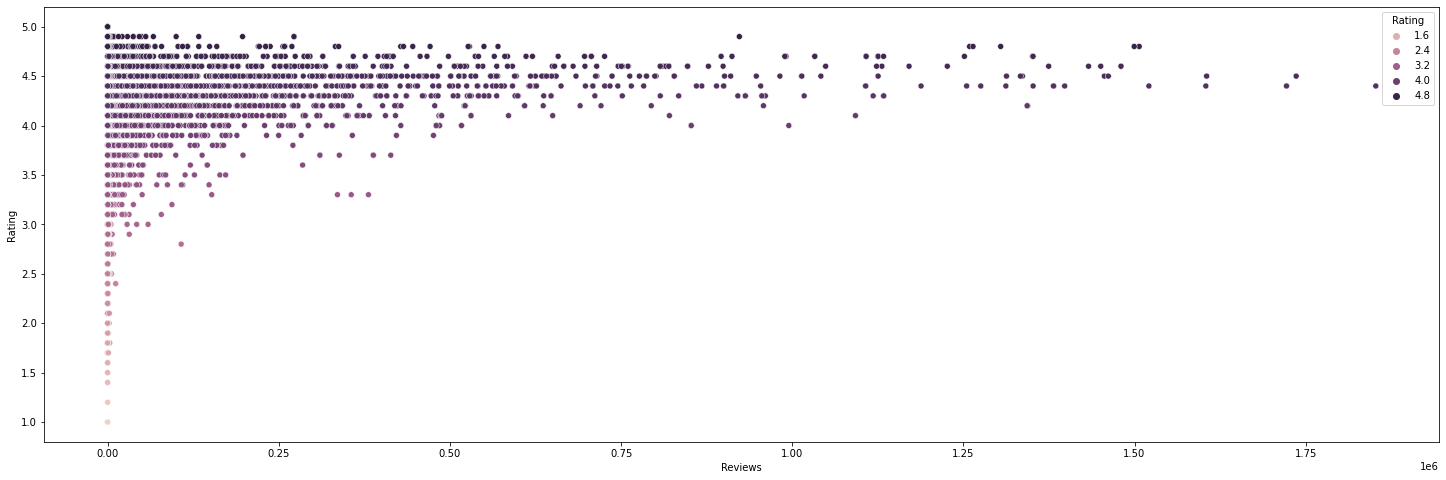

In [448]:
plt.figure(figsize=(25,8))
sns.scatterplot(df.Reviews,df.Rating,hue=df.Rating)
plt.show()

Reviews doesnot mean better ratings

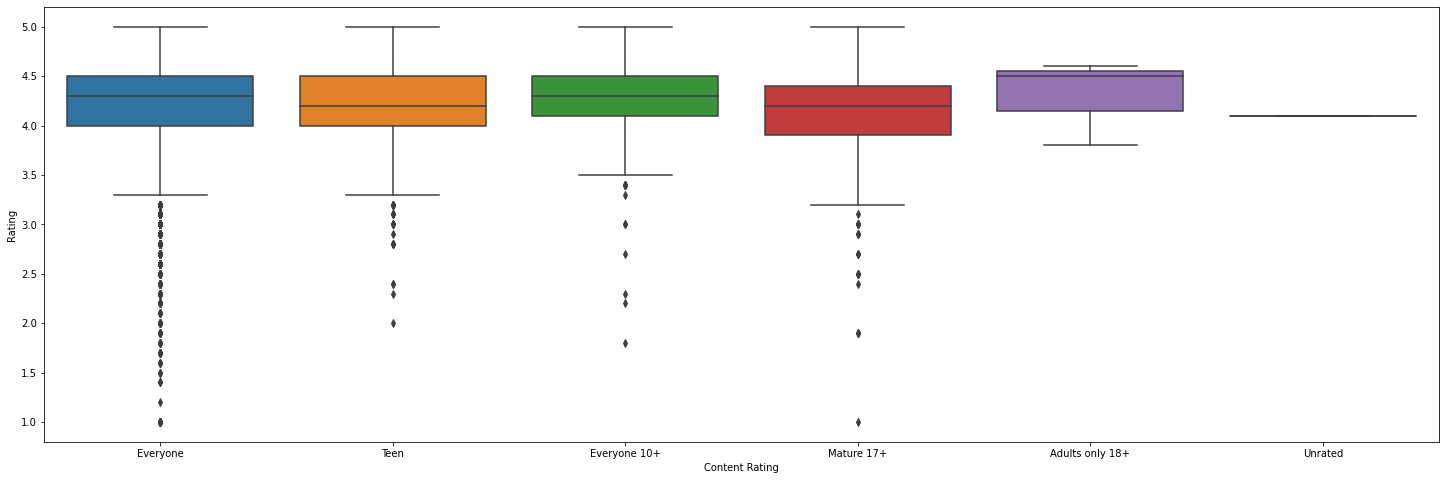

In [449]:
plt.figure(figsize=(25,8))
sns.boxplot(df["Content Rating"],df["Rating"])
plt.show()

1.There seems no relation between Content rating & Rating

2. Adults 18+  has Highest median rating 

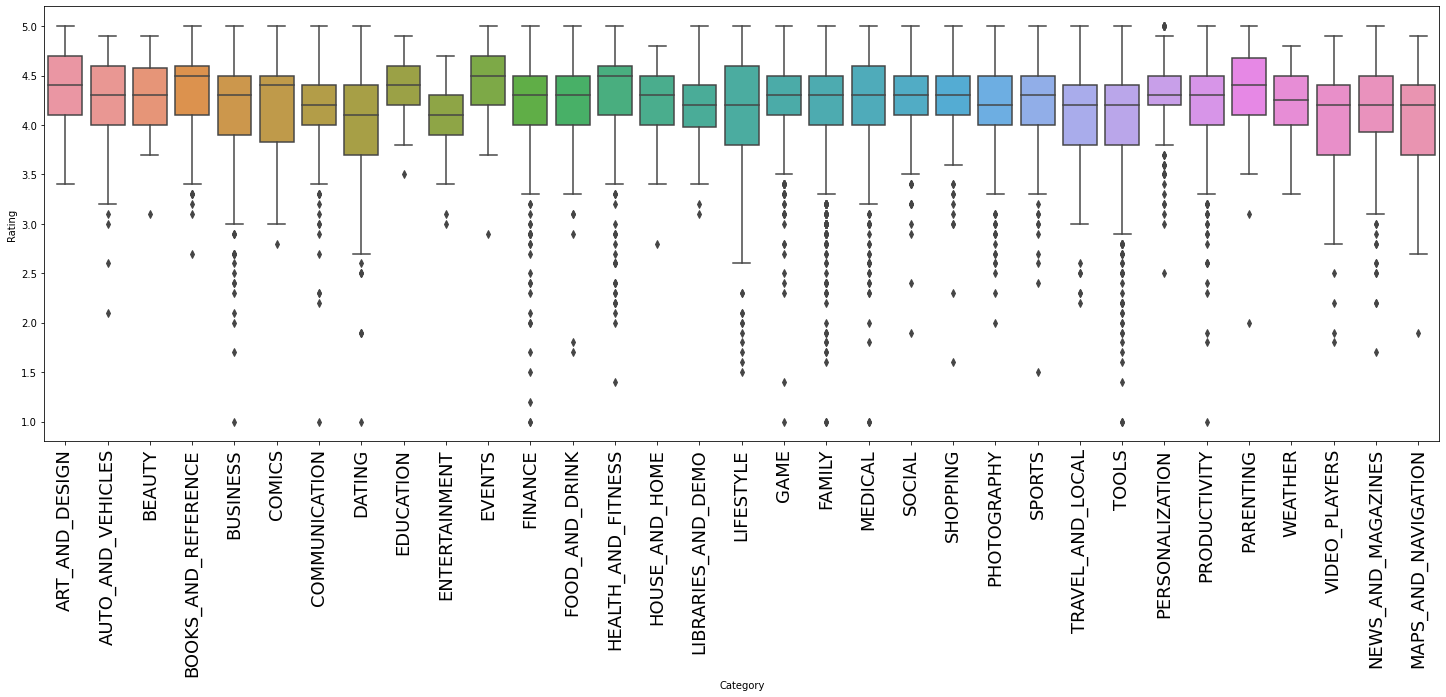

In [450]:
plt.figure(figsize=(25,8))
sns.boxplot(df.Category,df.Rating)
plt.xticks(fontsize=18,rotation='vertical')
plt.show()

1.as seen here there are only few categ apps having some ratings less than 1.5 

2.Categories such as Books & Reference, Events, Health & fitness has high median ratings

# Data preprocessing

In [451]:
inp1=df.copy()

We can deal outliers by converting the column into logarithmic fucntion 

In [452]:
inp1.Reviews=np.log(inp1['Reviews'])

In [453]:
inp1.Installs=np.log(inp1['Installs'])

drop the columns which are not necessary for the analysis

In [454]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver"],inplace=True,axis=1)

convert the columns with categorical values into dummy variables and drop the first row to avoid dummy variable trap

In [455]:
inp1=pd.get_dummies(inp1,drop_first=True)

In [456]:
inp2=inp1.copy()

In [457]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.068904,19000.0,9.210340,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.874198,14000.0,13.122363,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379508,8700.0,15.424948,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.874198,2800.0,11.512925,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.117994,5600.0,10.819778,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


define the dependent and independent variables

In [458]:
x=inp2.iloc[:,1:]
y=inp2.iloc[:,:1]

# Train test split

In [538]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=5)

Apply linear regression to the training set 

In [539]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(x_train, y_train)

In [540]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [541]:
print(r2_score(regressor.predict(x_train),y_train))

-4.310181109352127


In [542]:
y_pred=regressor.predict(x_test)

In [543]:
print('R2_Score=',r2_score(y_test,y_pred))

R2_Score= 0.14213148169972312


In [545]:
#Root Mean Squared Error
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.4835368897869392

Root Mean square error(RMSE)is 0.487

R2 score is found to be 0.142